<a href="https://colab.research.google.com/github/nirajpalve/Stroke-Prediction/blob/main/Niraj_Palve_3F_Stroke_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'darkpurple'><b>  STROKE PREDICTION</b></font></center>

![](https://media.istockphoto.com/photos/man-with-brain-stroke-symptoms-picture-id1168179082?k=20&m=1168179082&s=612x612&w=0&h=9OY1eRZhghhh4LPvsnxE5vx6G9tVF4piDqvRMrBdp3Y=)

# <font color = 'blue'> Problem Statement :</font>
- `A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.`
- `Determine what makes a person at risk for stroke.`
- `Create a machine learning model to perform early detection of stroke for patients.`

# <font color = 'darkpurple'><b>1 <span style='color:#0386f7de'>|</span> Importing Libraries & Loading Dataset</b></font>
- **`For Data Manipulation`**: numpy, pandas, sklearn.
- **`For Data Visualization`**: matplotlib, seaborn, plotly.
- **`For ML Models`**: sklearn.


In [1]:
import numpy as np      
import pandas as pd                  ## Importing Libraries
import seaborn as sns
import time
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings('ignore')

Dataset -
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
url = 'https://raw.githubusercontent.com/nirajpalve/Stroke-Prediction/main/stroke-data.csv'

In [3]:
data = pd.read_csv(url)    ## Loading Dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  <font color = 'blue'> <span style='color:#0386f7de'>|</span> About the Dataset <a id="prep"></a></font>

-`According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.`

-`Attribute Information`

- `1) Id: Unique identifier.`
- `2) Gender: "Male", "Female" or "Other".`
- `3) Age: Age of the patient.`
- `4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.`
- `5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.`
- `6) Ever_married: "No" or "Yes".`
- `7) Work_type: "Children", "Govt job", "Never worked", "Private" or "Self-employed".`
- `8) Residence_type: "Rural" or "Urban".`
- `9) Avg_glucose_level: Average glucose level in blood.`
- `10) BMI: Body Mass Index.`
- `11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".`
- `12) Stroke: 1 if the patient had a stroke or 0 if not.`


#  <font color = 'darkpurple'><b>2 <span style='color:#0386f7de'>|</span> Data Exploration and Validation <a id="prep"></a></font>

In [4]:
data.info()  ## To check wheather null value exist or not, data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see that .info gives us null value count and data types of each variables separately.

So, looking at the result bmi has 201 null counts.

In [5]:
data.drop(index = data[data['gender']=='Other'].index[0] , axis=0, inplace = True)  ## Dropping other-gender from gender's column

Dropping the other gender because it is only one in gender column and the response is also negative, by keeping it will not make any sence.

In [6]:
data.drop('id', axis = 1, inplace = True)  ## Removing 'id' column from the data.

Dropping the id column because if we input the data in the notebook default index is given to data, so its better to drop it.

In [7]:
df = data.copy() 

In [8]:
df.describe()  ## Describe the data.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Here .describe() gives information of numerical columns only.

 So it gives the count, mean, standard deviation, minimun,maximum values, also gives the weight of the data in percentage format.

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Data Visualization <a id="prep"></a></font>

Visualization for Categorical variables are :-
- `Count Plot.`
- `Pie Plot.`

Visualization for Numerical variables are:-
- `Histogram.`
- `Scatter Plot.` 

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Categorical Data <a id="prep"></a></font>

- **Count Plot** `show the counts of observations in each categorical bin using bars.`

- **Pie Plot** `categorical variable that divides your data into groups,Using for target varible which is categorical.`

####  <font color = 'green'>1.1 <span style='color:#0386f7de'>|</span> Gender <a id="prep"></a></font>

In [9]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

Unique values
 ['Male' 'Female']
Value Counts
 Female    2994
Male      2115
Name: gender, dtype: int64


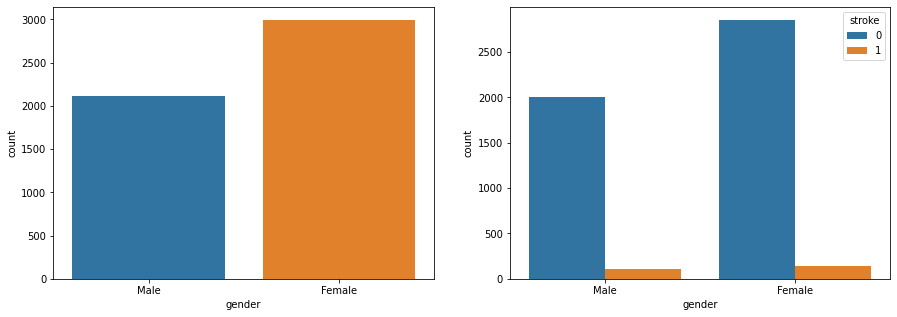

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Gender Visualization.
sns.countplot(df['gender'], data=df, ax = axes[0])
sns.countplot(df['gender'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- We can see that, there is not much difference between stroke rate concerning gender.

####  <font color = 'green'>1.2 <span style='color:#0386f7de'>|</span> Hypertension <a id="prep"></a></font>

In [11]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['hypertension'].unique())
print('Value Counts\n',df['hypertension'].value_counts())

Unique values
 [0 1]
Value Counts
 0    4611
1     498
Name: hypertension, dtype: int64


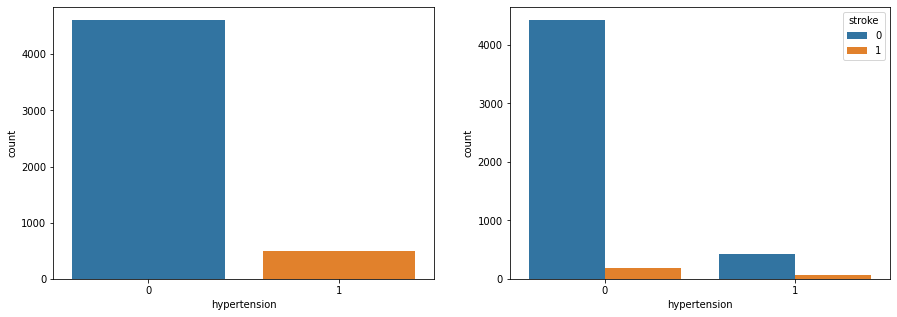

In [12]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Hypertension Visualization.
sns.countplot(df['hypertension'], data=df, ax = axes[0])
sns.countplot(df['hypertension'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- Hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. It has quite little data on patients having hypertension.

####  <font color = 'green'>1.3 <span style='color:#0386f7de'>|</span> Heart Disease <a id="prep"></a></font>

In [13]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

Unique values
 [1 0]
Value Counts
 0    4833
1     276
Name: heart_disease, dtype: int64


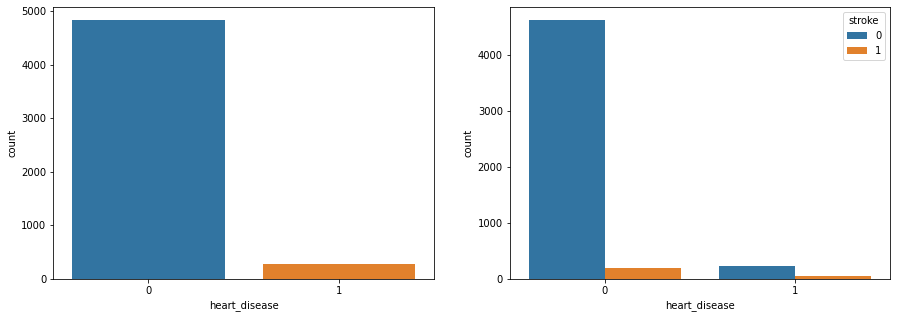

In [14]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(df['heart_disease'], data=df, ax = axes[0])
sns.countplot(df['heart_disease'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:-It’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

####  <font color = 'green'>1.4 <span style='color:#0386f7de'>|</span> Marital Status <a id="prep"></a></font>

In [15]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

Unique values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1756
Name: ever_married, dtype: int64


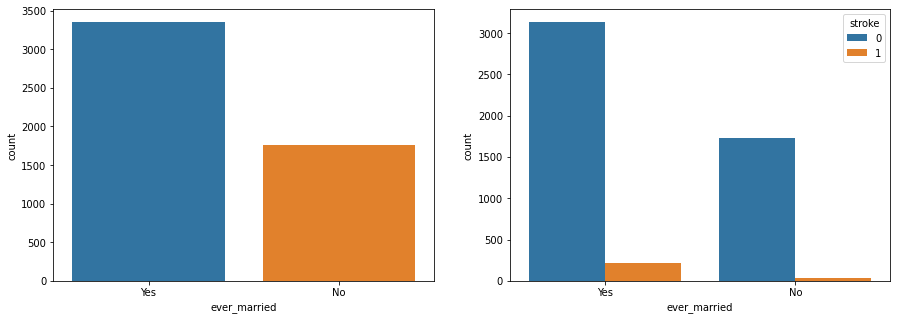

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Ever_Married Visualization.
sns.countplot(df['ever_married'], data=df, ax = axes[0])
sns.countplot(df['ever_married'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- There is high possibility that married person can have stroke.

####  <font color = 'green'>1.5 <span style='color:#0386f7de'>|</span> Work Type <a id="prep"></a></font>

In [17]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


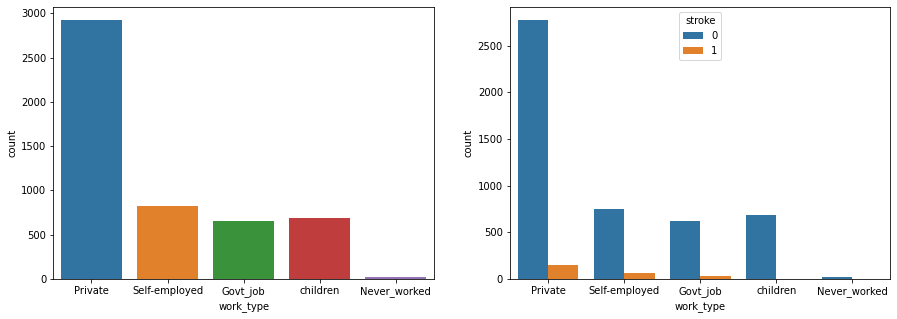

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Work_Type Visualization.
sns.countplot(df['work_type'], data=df, ax = axes[0])
sns.countplot(df['work_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

####  <font color = 'green'>1.6 <span style='color:#0386f7de'>|</span> Residence Type <a id="prep"></a></font>

In [19]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['Residence_type'].unique())
print('Value Counts\n',df['Residence_type'].value_counts())

Unique values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


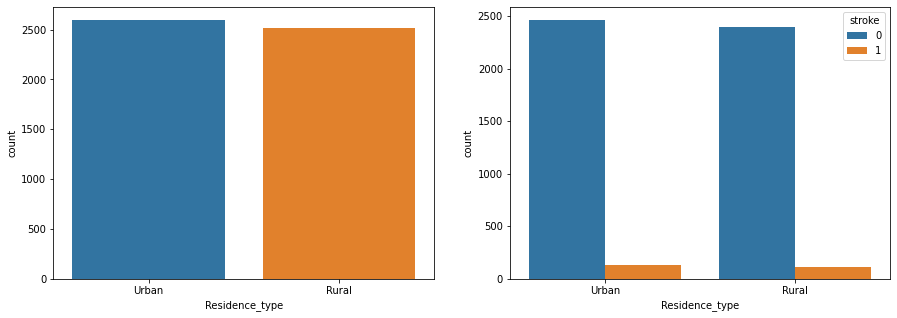

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Residence_Type Visualization.
sns.countplot(df['Residence_type'], data=df, ax = axes[0])
sns.countplot(df['Residence_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:-As we can see there not much difference in both attribute values. 

####  <font color = 'green'>1.7 <span style='color:#0386f7de'>|</span> Smoking Status <a id="prep"></a></font>

In [21]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


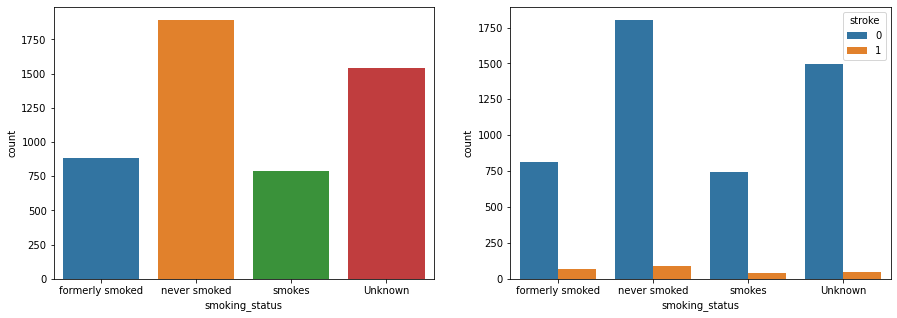

In [22]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Smoking_Status Visualization.
sns.countplot(df['smoking_status'], data=df, ax = axes[0])
sns.countplot(df['smoking_status'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- We can see there is not much difference in the chances of stroke irrespective of smoking status.

####  <font color = 'green'>1.8 <span style='color:#0386f7de'>|</span> Stroke <a id="prep"></a></font>

In [23]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['stroke'].unique())
print('Value Counts\n',df['stroke'].value_counts())

Unique values
 [1 0]
Value Counts
 0    4860
1     249
Name: stroke, dtype: int64


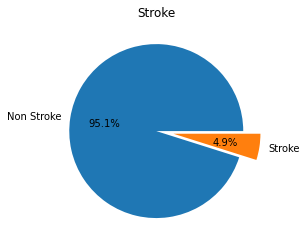

In [24]:
plt.title("Stroke")     ## Stroke Visualization
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

Observation:- There is only 4.9% patients get stroke and rest 95% are non-stroke patients.

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Numerical Data <a id="prep"></a></font>

- **Histogram** `is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size.`
- **Box Plot** `visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.`
- **Violin Plot** `is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.`

####  <font color = 'green'>2.1 <span style='color:#0386f7de'>|</span> Age <a id="prep"></a></font>

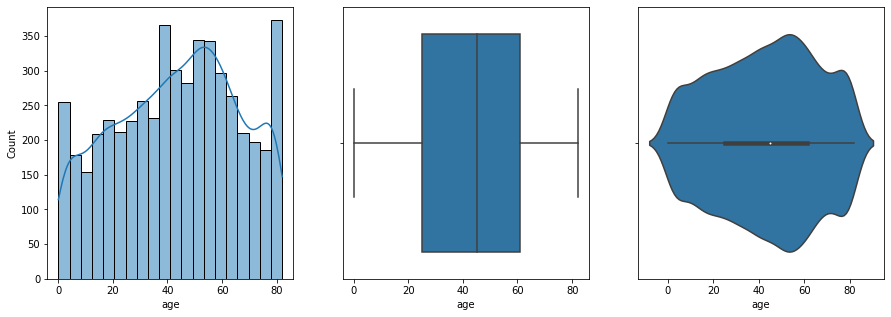

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = df, x = df['age'], ax = ax[1])
sns.violinplot(data = df, x = df['age'], ax = ax[2])
plt.show()

####  <font color = 'green'>2.2 <span style='color:#0386f7de'>|</span> Average_glucose_level <a id="prep"></a></font>

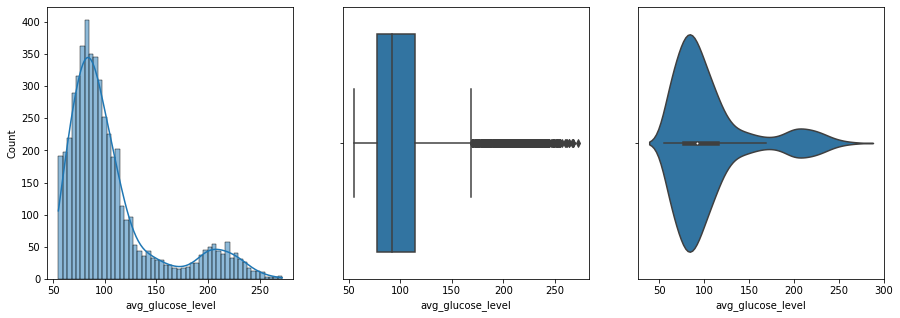

In [26]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['avg_glucose_level'], ax = ax[0], kde=True)    ## Glucose_level Visualization
sns.boxplot(data = df, x = df['avg_glucose_level'], ax = ax[1])
sns.violinplot(data = df, x = df['avg_glucose_level'], ax = ax[2])
plt.show()

[Link](https://www.lark.com/resources/blood-sugar-chart)

There are outliers present in avgerage_glucose column, we dont have to remove the outliers.

If we will not remove it will be help to our model to predict or perform well.

####  <font color = 'green'>2.3 <span style='color:#0386f7de'>|</span>BMI <a id="prep"></a></font>

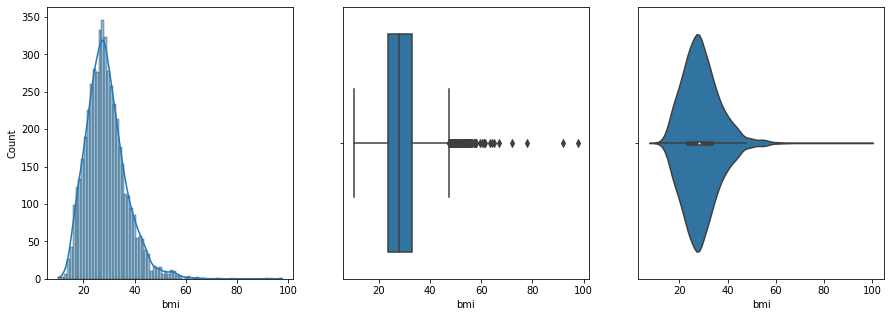

In [27]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['bmi'], ax = ax[0], kde=True)     ## BMI Visualization
sns.boxplot(data = df, x = df['bmi'], ax = ax[1])
sns.violinplot(data = df, x = df['bmi'], ax = ax[2])
plt.show()

- `If your BMI is less than 18.5, it falls within the underweight range.`
- `If your BMI is 18.5 to < 25, it falls within the healthy weight range.`
- `If your BMI is 25.0 to < 30, it falls within the overweight range.`
- `If your BMI is 30.0 or higher, it falls within the obesity range.`

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Cleaning Data <a id="prep"></a></font>

In [28]:
df.isnull().sum()   ##  Drop nulls or treat null values as instructed

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on. Looking into it I found that bmi mostly depends on age and gender. So trying to impute missing values based on gender.


After looking the data we get to know that there are 201 NA values in _bmi_ column, so for treating the data we will put the nan values as median.

In [29]:
df['bmi'].median()

28.1

In [30]:
df = df.fillna(28.1)

In [31]:
new = df['bmi'] > 50
median = df['bmi'].median()
df['bmi'][new] = median
new_1 = df['bmi'] < 15
df['bmi'][new_1] = median

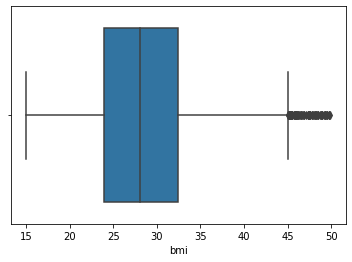

In [32]:
sns.boxplot(data = df, x = df['bmi'])
plt.show()

In [33]:
df['bmi'] = np.log(df['bmi'])

In [34]:
df_1 = df.copy()

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Convert Non-numerical Data into Numerical <a id="prep"></a></font>

- `Machine Learning Models can not work on categorical variables in the form of strings, so we need to change it into numerical form or binary
before you can fit and evaluate a model. `

In [35]:
df_1["gender"][df_1["gender"]=="Male"] = 1
df_1["gender"][df_1["gender"]=="Female"] = 0

In [36]:
df_1["ever_married"][df_1["ever_married"]=="Yes"]=1
df_1["ever_married"][df_1["ever_married"]=="No"]=0

In [37]:
df_1["Residence_type"][df_1["Residence_type"]=="Urban"]=1
df_1["Residence_type"][df_1["Residence_type"]=="Rural"]=0

In [38]:
df_1["work_type"][df_1["work_type"]=="Private"]=1
df_1["work_type"][df_1["work_type"]=="Self-employed"]=2
df_1["work_type"][df_1["work_type"]=="Govt_job"]=3
df_1["work_type"][df_1["work_type"]=="children"]=4
df_1["work_type"][df_1["work_type"]=="Never_worked"]=5

In [39]:
df_1["smoking_status"][df_1["smoking_status"]=="never smoked"]=1
df_1["smoking_status"][df_1["smoking_status"]=="Unknown"]=2
df_1["smoking_status"][df_1["smoking_status"]=="formerly smoked"]=3
df_1["smoking_status"][df_1["smoking_status"]=="smokes"]=4

In [40]:
df_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,3.600048,3,1
1,0,61.0,0,0,1,2,0,202.21,3.335770,1,1
2,1,80.0,0,1,1,1,0,105.92,3.481240,1,1
3,0,49.0,0,0,1,1,1,171.23,3.538057,4,1
4,0,79.0,1,0,1,2,0,174.12,3.178054,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,1,83.75,3.335770,1,0
5106,0,81.0,0,0,1,2,1,125.20,3.688879,1,0
5107,0,35.0,0,0,1,2,0,82.99,3.421000,1,0
5108,1,51.0,0,0,1,1,0,166.29,3.242592,3,0


## <font color = 'blue'><b> <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [41]:
X = df_1.drop(columns = 'stroke')  
y = df_1[['stroke']]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 12, stratify = y )  ## Spliting data into train and test.

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape   ## Shape of the train and test data.

((3831, 10), (1278, 10), (3831, 1), (1278, 1))

- `We need to know that how well your model is generalizing. Hence, you need to separate your input data into training, testing subsets to prevent your model from overfitting and to evaluate your model effectively.`
- `A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice.`

#  <font color = 'darkpurple'><b>3 <span style='color:#0386f7de'>|</span> Model Building (Simple Models) <a id="prep"></a></font>

- `The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data.`
- `So here we will build:-`
  - `Logistic Regression.`
  - `Decision Tree.`

<img src="https://miro.medium.com/max/838/1*IYfAEqJN6CDtBqS2WTN5Jg.png" width="400" height="300">

- **Confusion matrix** `is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the true class(actual target) values with those predicted by the machine learning model.`
- `TP: True Positive: The values which were actually positive and were predicted positive.`
- `FP: False Positive: The values which were actually negative but falsely predicted as positive. Also known as Type I Error.`
- `FN: False Negative: The values which were actually positive but falsely predicted as negative. Also known as Type II Error.`
- `TN: True Negative: The values which were actually negative and were predicted negative.`

- **Accuracy:**`It is calculated by dividing the total number of correct predictions by all the predictions.`

   <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Equation_Accuracy.png" width="300" height="70">

- **Recall:** `The recall is the measure to check correctly positive predicted outcomes out of the total number of positive outcomes.`

   <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Recall.png" width="150" height="70">

- **Precision:** `Precision checks how many outcomes are actually positive outcomes out of the total positively predicted outcomes.`

   <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Precision.png" width="170" height="70">

- **F1 score** `is a number between 0 and 1 and is the harmonic mean of precision and recall. `

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/f1score.png" width="300" height="100">

- **Sensitivity & Specificity** 

<img src="https://miro.medium.com/max/828/1*FJNxbk7Ccr1hINGQmgKMcw.webp" width="500" height="400">


###  <font color = 'blue'><b>3.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [44]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [45]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic_model.intercept_)
print("coefficients = \n " , logistic_model.coef_)

Intercept = [-1.87856671]
coefficients = 
  [[-0.12205748  0.06646128  0.77552186  0.22394307 -0.36026149 -0.20353271
  -0.13271057  0.00262663 -1.40222723  0.06703072]]


In [46]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on train data

predict1 = logistic_model.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
print("COnfusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on train data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

COnfusion matrix = 
 [[3643    1]
 [ 186    1]]
Overall accuracy on train data for all the variables =  0.9511876794570608
Accuracy :  0.9511876794570608
Sensitivity :  0.9997255762897914
Specificity :  0.0053475935828877


In [47]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)

    # Predicting using the test data
    predict = logistic.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test,y_test)

    # Predicting using the test data
    predict = logistic.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.9527404921700223, 0.9510626398210291, 0.9552572706935123, 0.9485458612975392, 0.9516219239373602, 0.9510626398210291, 0.9527404921700223, 0.9510626398210291, 0.9502237136465325, 0.9485458612975392, 0.9496644295302014, 0.953579418344519, 0.9519015659955258, 0.9482662192393736, 0.9521812080536913, 0.9502237136465325, 0.9552572706935123, 0.9530201342281879, 0.9513422818791947, 0.9521812080536913, 0.9496644295302014, 0.953579418344519, 0.9510626398210291, 0.9485458612975392, 0.9532997762863534, 0.9538590604026845, 0.9516219239373602, 0.9546979865771812, 0.9499440715883669, 0.9496644295302014, 0.947986577181208, 0.9493847874720358, 0.956096196868009, 0.9524608501118568, 0.9519015659955258, 0.9541387024608501, 0.9524608501118568, 0.9530201342281879, 0.9477069351230425, 0.9507829977628636, 0.9491051454138703, 0.9474272930648769, 0.9493847874720358, 0.9496644295302014, 0.9510626398210291, 0.9532997762863534, 0.9524608501118568, 0.9530201342281879, 0.9510626398210291,

Here, in this code we are running the model for 100 many times to get range of train and testing acurracy for the model. 

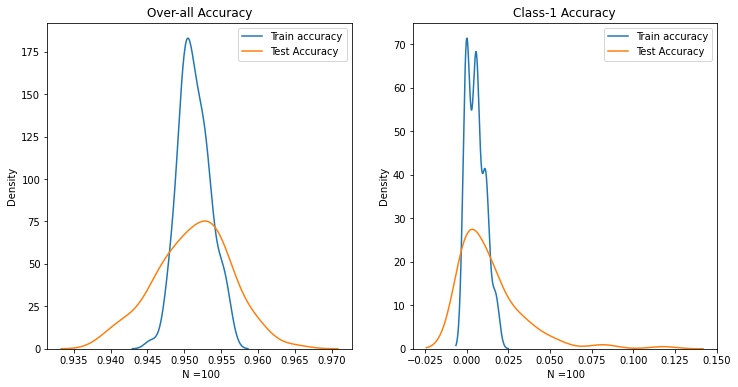

In [48]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>3.2 <span style='color:#0386f7de'>|</span> Decision Tree<a id="prep"></a></font>

In [49]:
feature = ['age','hypertension','heart_disease','avg_glucose_level','bmi_1','gender_Male','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']

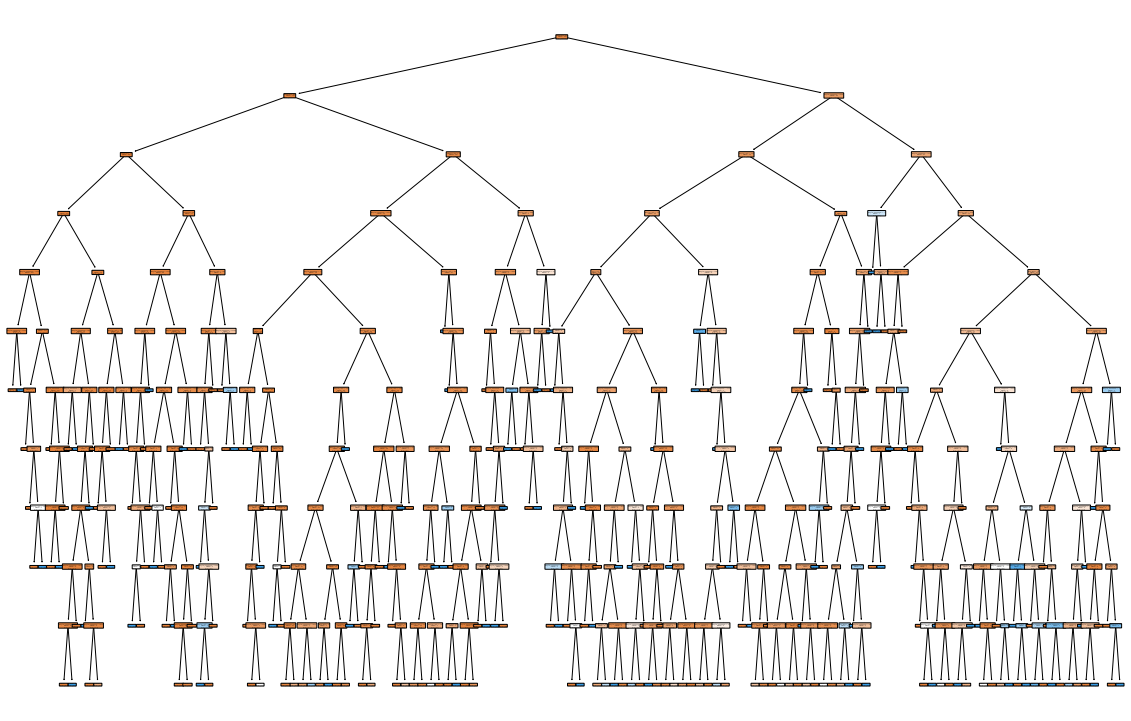

In [50]:
from sklearn import tree
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=11)
DTree.fit(X,y)

##Plotting the trees 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = feature)
plt.show()

In [51]:
dt_model = DecisionTreeClassifier(random_state=12,max_depth=11)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, random_state=12)

In [52]:
predict1 = dt_model.predict(X_train)
predict2 = dt_model.predict(X_test)

cm = confusion_matrix(y_train, predict1)
print ("CM:",   cm)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

CM: [[3396    2]
 [  76  102]]
Train Accuracy 0.9781879194630873
Test Accuracy 0.9275929549902152
Sensitivity :  0.9994114184814596
Specificity :  0.5730337078651685


In [53]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=11)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.9793064876957495, 0.9821029082774049, 0.9935682326621924, 0.985178970917226, 0.9781879194630873, 0.9874161073825504, 0.9815436241610739, 0.9821029082774049, 0.9815436241610739, 0.9821029082774049, 0.9941275167785235, 0.9781879194630873, 0.9843400447427293, 0.9829418344519015, 0.9815436241610739, 0.9840604026845637, 0.9904921700223713, 0.982662192393736, 0.9823825503355704, 0.9779082774049217, 0.9899328859060402, 0.9756711409395973, 0.9843400447427293, 0.9846196868008948, 0.9871364653243848, 0.9843400447427293, 0.9879753914988815, 0.9823825503355704, 0.9790268456375839, 0.9818232662192393, 0.985178970917226, 0.985178970917226, 0.9801454138702461, 0.9862975391498882, 0.9823825503355704, 0.9865771812080537, 0.9767897091722595, 0.9823825503355704, 0.9776286353467561, 0.9843400447427293, 0.9860178970917226, 0.9832214765100671, 0.9829418344519015, 0.9823825503355704, 0.985178970917226, 0.9890939597315436, 0.9837807606263982, 0.9821029082774049, 0.9801454138702461, 

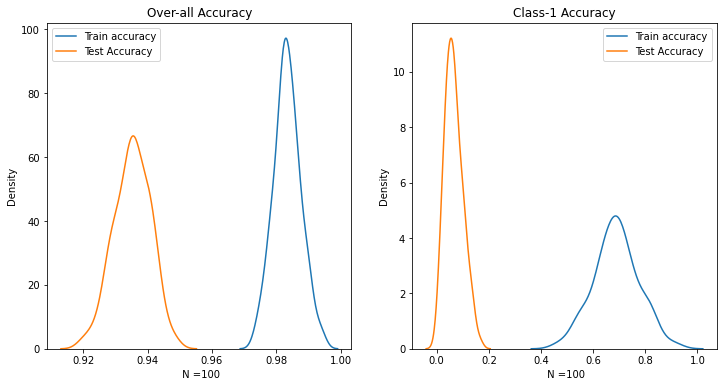

In [54]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

#  <font color = 'darkpurple'><b>4<span style='color:#0386f7de'>|</span> Feature Engineering <a id="prep"></a></font>

###  <font color = 'blue'><b>4.1 <span style='color:#0386f7de'>|</span> One Hot Encoding  <a id="prep"></a></font>

- ***One Hot Encoding*** `is a process by which categorical variables are converted into binary value form that could be provided to ML algorithms to do a better job in prediction.`

In [55]:
df_2 = df.copy()

In [56]:
num_cols = ['age','avg_glucose_level','bmi_1'] 
cat_col = ['work_type','smoking_status'] ## Dividing numerical and categorical data for numerical.
cat_cols = ['gender','ever_married','Residence_type']

In [57]:
df_encc = pd.get_dummies(df_2[cat_cols], drop_first=True)
df_enc = pd.get_dummies(df_2[cat_col])

In [58]:
df_2[df_encc.columns] = df_encc
df_2[df_enc.columns] = df_enc
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,3.600048,formerly smoked,...,1,0,0,1,0,0,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,3.335770,never smoked,...,0,0,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,3.481240,never smoked,...,0,0,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,3.538057,smokes,...,1,0,0,1,0,0,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,3.178054,never smoked,...,0,0,0,0,1,0,0,0,1,0


In [59]:
df_2.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis =1, inplace = True)

With the help of one hot encoding we have created the new columns, so we will drop the earlier columns.

In [60]:
df_2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,3.600048,1,1,1,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,3.335770,1,0,1,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,3.481240,1,1,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,3.538057,1,0,1,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,3.178054,1,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,3.335770,0,0,1,1,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,3.688879,0,0,1,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,3.421000,0,0,1,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,3.242592,0,1,1,0,0,0,1,0,0,0,1,0,0


##  <font color = 'blue'><b>4.2 <span style='color:#0386f7de'>|</span> Over Sampling <a id="prep"></a></font>

Looking at stroke visualization, we can tell that our data is not equally distributed. So here we will use over sampling method to balance our target variable.

In [61]:
print("Actual Data :", df_2.shape)

#Frequency count on target column
freq = df_2['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
stroke_class0 = df_2[df_2['stroke'] == 0]
stroke_class1 = df_2[df_2['stroke'] == 1]

print("Class0 Actual :", stroke_class0.shape)
print("Class1 Actual  :", stroke_class1.shape)


Actual Data : (5109, 18)
0    4860
1     249
Name: stroke, dtype: int64
0    95.126248
1     4.873752
Name: stroke, dtype: float64
Class0 Actual : (4860, 18)
Class1 Actual  : (249, 18)


In [62]:
##Undersampling of class-0
## Consider half of class-0
stroke_class0_under = stroke_class0.sample(int(0.5*len(stroke_class0)))
print("Class0 Undersample :", stroke_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
stroke_class1_over = stroke_class1.sample(8*len(stroke_class1),replace=True)
print("Class1 Oversample :", stroke_class1_over.shape)

#Concatenate to create the final balanced data
stroke_balanced=pd.concat([stroke_class0_under,stroke_class1_over])
print("Final Balannced Data :", stroke_balanced.shape)
#Frequency count on target column in the balanced data
freq=stroke_balanced['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (2430, 18)
Class1 Oversample : (1992, 18)
Final Balannced Data : (4422, 18)
0    2430
1    1992
Name: stroke, dtype: int64
0    54.95251
1    45.04749
Name: stroke, dtype: float64


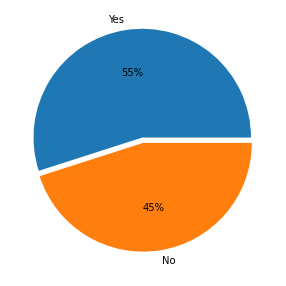

In [63]:
plt.figure(figsize=(8,5))
plt.pie(x=stroke_balanced['stroke'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

##  <font color = 'blue'><b>4.3 <span style='color:#0386f7de'>|</span> Correlation Matrix  <a id="prep"></a></font>

In [64]:
df_3 = stroke_balanced.copy()

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.
The value of the matrix lies between -1 and 1.


In [65]:
corr_matrix = df_3.corr()   ## Corrlation Matrix.
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.290432,0.277709,0.263398,0.270882,0.562950,-0.009861,0.579854,0.031179,0.068140,-0.088017,0.089860,0.274177,-0.620698,-0.329728,0.214188,0.101622,0.013428
hypertension,0.290432,1.000000,0.090819,0.180821,0.143749,0.254475,-0.010027,0.105820,-0.017993,-0.008105,-0.025207,-0.055277,0.173962,-0.139450,-0.198462,0.082163,0.101358,0.008060
heart_disease,0.277709,0.090819,1.000000,0.238786,0.068645,0.224403,0.099968,0.082073,0.030714,0.027643,-0.019366,0.036230,0.009579,-0.107135,-0.054604,0.027251,-0.070982,0.124271
avg_glucose_level,0.263398,0.180821,0.238786,1.000000,0.243957,0.234051,0.129411,0.197319,0.028670,0.040257,-0.022533,0.067058,-0.019308,-0.134347,-0.104365,0.074592,0.015279,0.018460
bmi,0.270882,0.143749,0.068645,0.243957,1.000000,0.147794,0.027722,0.313346,0.041532,0.036408,-0.027116,0.189744,0.044339,-0.439808,-0.252396,0.115262,0.064561,0.081117
stroke,0.562950,0.254475,0.224403,0.234051,0.147794,1.000000,0.018460,0.276176,0.039989,-0.006173,-0.049164,0.067510,0.099179,-0.247233,-0.150474,0.141730,-0.015787,0.037479
gender_Male,-0.009861,-0.010027,0.099968,0.129411,0.027722,0.018460,1.000000,0.029498,0.017121,-0.060392,0.012729,0.040236,-0.043755,0.060323,0.060908,0.060742,-0.148309,0.053284
ever_married_Yes,0.579854,0.105820,0.082073,0.197319,0.313346,0.276176,0.029498,1.000000,-0.030082,0.067106,-0.094650,0.138769,0.148952,-0.523614,-0.295639,0.185875,0.022781,0.106767
Residence_type_Urban,0.031179,-0.017993,0.030714,0.028670,0.041532,0.039989,0.017121,-0.030082,1.000000,0.026493,0.018932,-0.009345,-0.006198,-0.009234,0.032064,-0.006033,-0.048570,0.032109
work_type_Govt_job,0.068140,-0.008105,0.027643,0.040257,0.036408,-0.006173,-0.060392,0.067106,0.026493,1.000000,-0.019973,-0.446243,-0.183735,-0.110495,-0.048413,0.019642,0.000009,0.034205


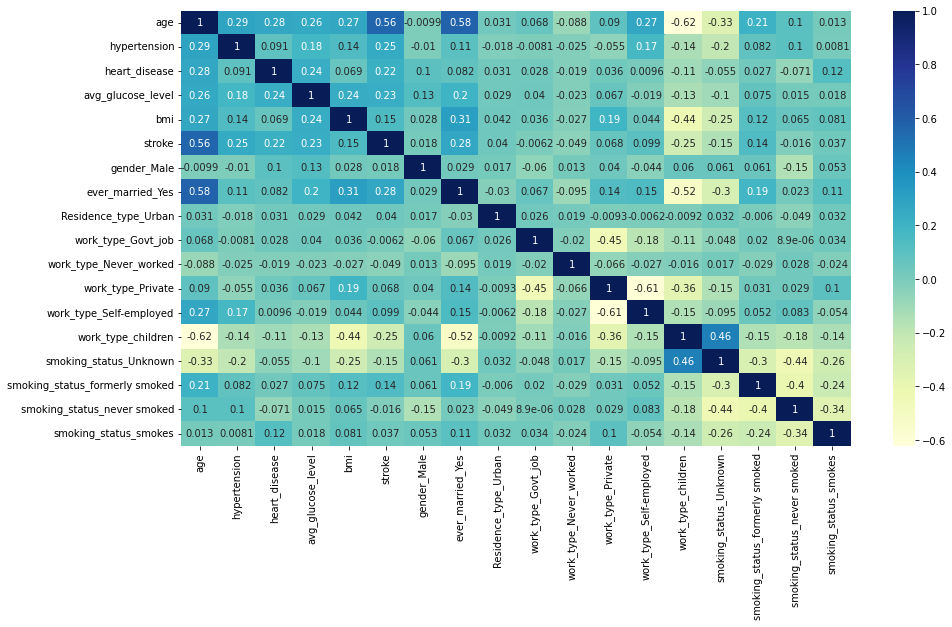

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map 
plt.show()

## <font color = 'blue'><b>4.4 <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [67]:
X_1 = df_3.drop(columns = 'stroke')  
y_1 = df_3[['stroke']]

In [68]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1, y_1, random_state = 12)  ## Spliting data into train and test.

In [69]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape   ## Shape of the train and test data.

((3316, 17), (1106, 17), (3316, 1), (1106, 1))

#  <font color = 'darkpurple'><b>5 <span style='color:#0386f7de'>|</span>Model Building(Up-dated)<a id="prep"></a></font>

###  <font color = 'blue'><b>5.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [70]:
logistic_model = LogisticRegression()    ## Importing Model.
logistic_model.fit(X_train_1,y_train_1)

LogisticRegression()

In [71]:
logistic_pred_train = logistic_model.predict(X_train_1) ## Training Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,logistic_pred_train))

Accuracy Score                 : 0.7826
Precision Score                : 0.7456
Recall Score                   : 0.7794
Confusion Matrix               :
 [[1440  394]
 [ 327 1155]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1834
           1       0.75      0.78      0.76      1482

    accuracy                           0.78      3316
   macro avg       0.78      0.78      0.78      3316
weighted avg       0.78      0.78      0.78      3316



In [72]:
logistic_pred_test = logistic_model.predict(X_test_1)   ## Testing Accuracy
print('Accuracy Score                 :',round(accuracy_score(y_test_1,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,logistic_pred_test))

Accuracy Score                 : 0.7785
Precision Score                : 0.7486
Recall Score                   : 0.7824
Confusion Matrix               :
 [[462 134]
 [111 399]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       596
           1       0.75      0.78      0.77       510

    accuracy                           0.78      1106
   macro avg       0.78      0.78      0.78      1106
weighted avg       0.78      0.78      0.78      1106



Area Under Curve     : 0.7787603632056849


Text(0, 0.5, 'True Positive Rate')

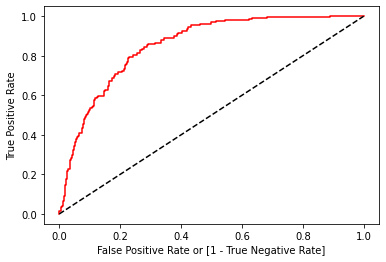

In [73]:
fpr, tpr, thresholds = roc_curve(y_test_1,logistic_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, logistic_pred_test)  ## Auc_Roc Curve.
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [74]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = logistic.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test_1,y_test_1)

    # Predicting using the test data
    predict = logistic.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.7667205169628433, 0.7618739903069467, 0.779967689822294, 0.7634894991922455, 0.7735056542810985, 0.7693053311793215, 0.7741518578352181, 0.7712439418416801, 0.7702746365105008, 0.777059773828756, 0.7783521809369952, 0.7641357027463651, 0.7718901453957997, 0.7712439418416801, 0.7773828756058159, 0.777059773828756, 0.7822294022617124, 0.7686591276252019, 0.7903069466882068, 0.772859450726979, 0.7783521809369952, 0.7709208400646204, 0.7747980613893376, 0.7709208400646204, 0.7751211631663975, 0.7854604200323102, 0.7731825525040388, 0.7802907915993538, 0.7735056542810985, 0.787075928917609, 0.7709208400646204, 0.7802907915993538, 0.779967689822294, 0.7735056542810985, 0.7673667205169629, 0.7689822294022617, 0.7647819063004847, 0.777059773828756, 0.7828756058158319, 0.7680129240710823, 0.7589660743134087, 0.7835218093699515, 0.7660743134087238, 0.7683360258481422, 0.7709208400646204, 0.778675282714055, 0.778675282714055, 0.7702746365105008, 0.7844911147011309, 0.77

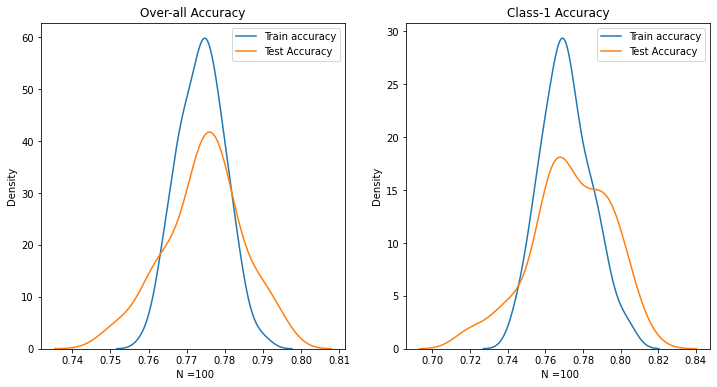

In [75]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>5.2 <span style='color:#0386f7de'>|</span> Decision Tree <a id="prep"></a></font>

In [76]:
dt_model = DecisionTreeClassifier(random_state=15,max_depth=10)
dt_model.fit(X_train_1,y_train_1)       ## Importing Model

DecisionTreeClassifier(max_depth=10, random_state=15)

In [77]:
dt_pred_train = dt_model.predict(X_train_1)   ## Trainig Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,dt_pred_train))

Accuracy Score                 : 0.9318
Precision Score                : 0.8689
Recall Score                   : 0.9986
Confusion Matrix               :
 [[1499  209]
 [   2 1385]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      1708
           1       0.87      1.00      0.93      1387

    accuracy                           0.93      3095
   macro avg       0.93      0.94      0.93      3095
weighted avg       0.94      0.93      0.93      3095



In [78]:
dt_pred_test = dt_model.predict(X_test_1)   ## Testing Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,dt_pred_test))

Accuracy Score                 : 0.902
Precision Score                : 0.8231
Recall Score                   : 1.0
Confusion Matrix               :
 [[592 130]
 [  0 605]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       722
           1       0.82      1.00      0.90       605

    accuracy                           0.90      1327
   macro avg       0.91      0.91      0.90      1327
weighted avg       0.92      0.90      0.90      1327



Area Under Curve     : 0.909972299168975


Text(0, 0.5, 'True Positive Rate')

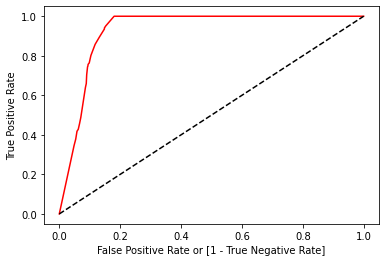

In [79]:
fpr, tpr, thresholds = roc_curve(y_test_1,dt_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, dt_pred_test) ## Auc_ROC Curve.
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [80]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=7)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.8778675282714055, 0.8688206785137318, 0.8817447495961228, 0.8768982229402261, 0.858481421647819, 0.8694668820678514, 0.8759289176090469, 0.8726978998384491, 0.8697899838449111, 0.8852988691437803, 0.8714054927302101, 0.8717285945072698, 0.8720516962843295, 0.8659127625201939, 0.8752827140549273, 0.8739903069466882, 0.8701130856219709, 0.8794830371567044, 0.8697899838449111, 0.8746365105008077, 0.8649434571890146, 0.8707592891760905, 0.8830371567043619, 0.8688206785137318, 0.875605815831987, 0.881421647819063, 0.8704361873990307, 0.8720516962843295, 0.8781906300484653, 0.8704361873990307, 0.864297253634895, 0.8739903069466882, 0.8768982229402261, 0.8626817447495961, 0.8626817447495961, 0.8714054927302101, 0.8775444264943457, 0.877221324717286, 0.8646203554119548, 0.8807754442649435, 0.8752827140549273, 0.8733441033925686, 0.8752827140549273, 0.8723747980613893, 0.8623586429725364, 0.8688206785137318, 0.8869143780290791, 0.8694668820678514, 0.8798061389337641, 

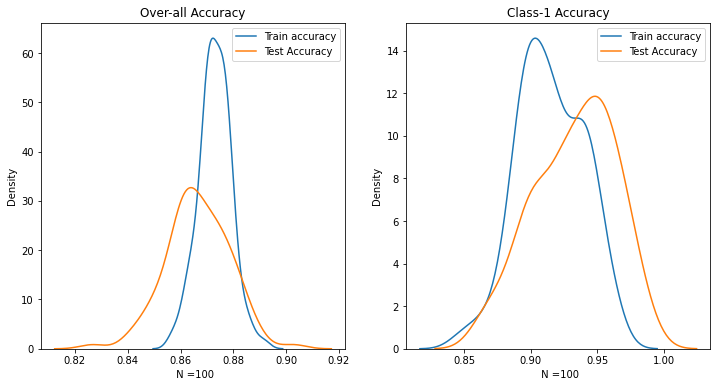

In [81]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>5.3 <span style='color:#0386f7de'>|</span> Random Forest <a id="prep"></a></font>

In [82]:
rf_model = RandomForestClassifier(random_state=15,max_depth=10)
rf_model.fit(X_train_1,y_train_1)    ## Importing Model

RandomForestClassifier(max_depth=10, random_state=15)

In [83]:
rf_pred_train = rf_model.predict(X_train_1)    ## Training Accuaracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,rf_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,rf_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,rf_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,rf_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,rf_pred_train))

Accuracy Score                 : 0.9712
Precision Score                : 0.946
Recall Score                   : 0.9928
Confusion Matrix               :
 [[1623   79]
 [  10 1383]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1702
           1       0.95      0.99      0.97      1393

    accuracy                           0.97      3095
   macro avg       0.97      0.97      0.97      3095
weighted avg       0.97      0.97      0.97      3095



In [84]:
rf_pred_test = rf_model.predict(X_test_1)   ## Testing Accuarcy
print('Accuracy Score                 :',round(accuracy_score(y_test_1,rf_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,rf_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,rf_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,rf_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,rf_pred_test))

Accuracy Score                 : 0.9299
Precision Score                : 0.8787
Recall Score                   : 0.98
Confusion Matrix               :
 [[647  81]
 [ 12 587]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       728
           1       0.88      0.98      0.93       599

    accuracy                           0.93      1327
   macro avg       0.93      0.93      0.93      1327
weighted avg       0.94      0.93      0.93      1327



Area Under Curve     : 0.9343514373773139


Text(0, 0.5, 'True Positive Rate')

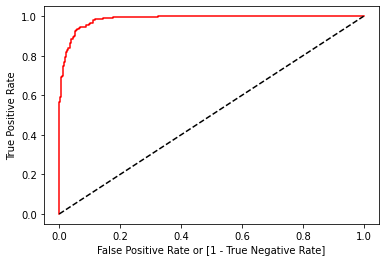

In [85]:
fpr, tpr, thresholds = roc_curve(y_test_1,rf_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, rf_pred_test)   ## Auc-Roc Curve.
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = 'blue'><b>5.4 <span style='color:#0386f7de'>|</span> Gradient Boosting Classifier <a id="prep"></a></font>

In [86]:
gradient_model = GradientBoostingClassifier(random_state=15,n_estimators=100,learning_rate=0.1, max_depth=8)
## Fitting the gradient boost classifier
start_time = time.time()
gradient_model.fit(X_train_1,y_train_1)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

Time taken by GBM 1.21323561668396 Seconds


In [87]:
gradient_pred_train = gradient_model.predict(X_train_1)   ## Training Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,gradient_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,gradient_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,gradient_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,gradient_pred_train))

Accuracy Score                 : 1.0
Precision Score                : 1.0
Recall Score                   : 1.0
Confusion Matrix               :
 [[1702    0]
 [   0 1393]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1702
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095



In [88]:
gradient_pred_test = gradient_model.predict(X_test_1)   ## Testing Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,gradient_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,gradient_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,gradient_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,gradient_pred_test))

Accuracy Score                 : 0.9578
Precision Score                : 0.9145
Recall Score                   : 1.0
Confusion Matrix               :
 [[672  56]
 [  0 599]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       728
           1       0.91      1.00      0.96       599

    accuracy                           0.96      1327
   macro avg       0.96      0.96      0.96      1327
weighted avg       0.96      0.96      0.96      1327



Area Under Curve     : 0.9615384615384616


Text(0, 0.5, 'True Positive Rate')

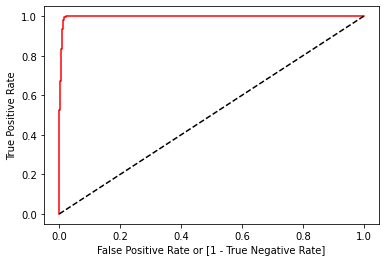

In [89]:
fpr, tpr, thresholds = roc_curve(y_test_1,gradient_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, gradient_pred_test)   ## Auc-Roc Curve.
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = 'blue'><b>5.5 <span style='color:#0386f7de'>|</span> XGB <a id="prep"></a></font>

In [90]:
xgb_model = XGBClassifier(max_depth=11,random_state=15)
start_time = time.time()           ## Importing Model.
xgb_model.fit(X_train_1,y_train_1)
print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

Time taken by XGB 0.8605091571807861 Seconds


In [91]:
xgb_pred_train = xgb_model.predict(X_train_1)    ## Trainig Accuarcy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,xgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,xgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,xgb_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,xgb_pred_train))

Accuracy Score                 : 0.9994
Precision Score                : 0.9986
Recall Score                   : 1.0
Confusion Matrix               :
 [[1700    2]
 [   0 1393]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1702
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095



In [92]:
xgb_pred_test = xgb_model.predict(X_test_1)     ## Testing Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,xgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,xgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,xgb_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,xgb_pred_test))

Accuracy Score                 : 0.9503
Precision Score                : 0.9008
Recall Score                   : 1.0
Confusion Matrix               :
 [[662  66]
 [  0 599]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       728
           1       0.90      1.00      0.95       599

    accuracy                           0.95      1327
   macro avg       0.95      0.95      0.95      1327
weighted avg       0.96      0.95      0.95      1327



Area Under Curve     : 0.9546703296703296


Text(0, 0.5, 'True Positive Rate')

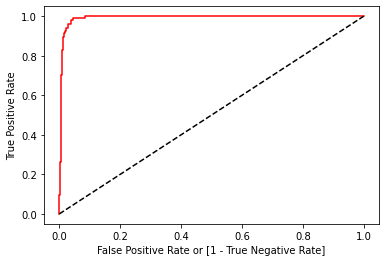

In [93]:
fpr, tpr, thresholds = roc_curve(y_test_1,xgb_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, xgb_pred_test)   ## Auc-Roc Curve.
print('Area Under Curve     :',auc_score)  
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#  <font color = 'darkpurple'>6 <span style='color:#0386f7de'>|</span>Feature Importance For Best Model Accuracy. <a id="prep"></a></font>

As we see that, gradient boosting model is giving us highest accuarcy so we will form feature importance according for the same model.

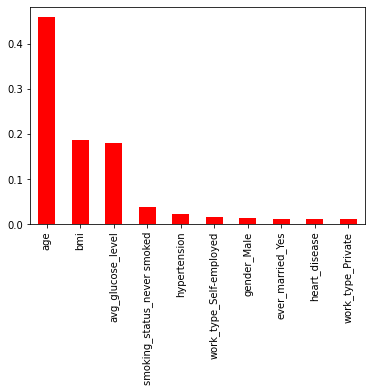

In [98]:
## Plot graph of feature importances.
feat_importances = pd.Series(gradient_model.feature_importances_, index=X_1.columns)
feat_importances.nlargest(10).plot.bar(color='red')
plt.show()

#  <font color = 'darkpurple'><b>6 <span style='color:#0386f7de'>|</span> All Model wise Accuracy <a id="prep"></a></font>

In [99]:
resultdata =[['Logistic Regression',0.7826,0.7785,0.7486,0.7824],
            ['Decision Tree',0.9318,0.902, 0.8231,1.0],
            ['Random Forest',0.9712,0.9299,0.8787,0.98],
            ['Gradient Boosting',1.0,0.9578, 0.9145,1.0],
             ['XGB',0.9994,0.9503,0.9008,1.0]]

result_df = pd.DataFrame(resultdata,columns=['Models','Training Accuracy','Test Accuracy','Precision Score','Recall Score'])
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
0,Logistic Regression,0.7826,0.7785,0.7486,0.7824
1,Decision Tree,0.9318,0.9020,0.8231,1.0000
2,Random Forest,0.9712,0.9299,0.8787,0.9800
3,Gradient Boosting,1.0000,0.9578,0.9145,1.0000
4,XGB,0.9994,0.9503,0.9008,1.0000


In [101]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
3,Gradient Boosting,1.0000,0.9578,0.9145,1.0000
4,XGB,0.9994,0.9503,0.9008,1.0000
2,Random Forest,0.9712,0.9299,0.8787,0.9800
1,Decision Tree,0.9318,0.9020,0.8231,1.0000
0,Logistic Regression,0.7826,0.7785,0.7486,0.7824
